In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/m5/9j_7j_8j5m154hyxw8j2346h0000gn/T/ipykernel_30732/3824089674.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
ask_rate_cols = [f'askRate{idx}' for idx in range(15)]
ask_size_cols = [f'askSize{idx}' for idx in range(15)]
bid_rate_cols = [f'bidRate{idx}' for idx in range(15)]
bid_size_cols = [f'bidSize{idx}' for idx in range(15)]

- bid - buy price
- ask - sell price

In [1]:
def draw_moment_book(row: pd.DataFrame, radius: int=15, horizontal_view=True) -> pd.DataFrame:
    row_dict = row.iloc[0].to_dict()
    ask_book = {row_dict[f'askRate{idx}']: row_dict[f'askSize{idx}'] for idx in range(radius)}
    bid_book = {row_dict[f'bidRate{idx}']: row_dict[f'bidSize{idx}'] for idx in range(radius)}
    
    prices = sorted(set(np.hstack((
        row[ask_rate_cols[:radius]], 
        row[bid_rate_cols[:radius]]
    )).ravel().tolist()))
    
    book = []
    for price in prices:
        record = {
            'bid#': int(bid_book.get(price, 0)),
            'rate': price,
            'ask#': int(ask_book.get(price, 0))
        }
        book.append(record)
    book_df = pd.DataFrame(book).sort_values('rate', ascending=False)
    if horizontal_view:
        book_df = book_df.set_index('rate').T
    return book_df

NameError: name 'pd' is not defined

For this exercise we have a prediction problem.

The set-up is the following:

1 - For each point you have target variable "y", and 60 features (4 groups of 15 features representing the state of the order book at each point in time).

2 - Whenever there is a NaN in any of askRate,bidRate,askSize,bidSize, it means that the book is empty beyond that level (you can interpret it as the size being zero).

3 - Your forecast of y(k) can depend on askRate[:k+1,:], bidRate[:k+1,:], askSize[:k+1,:], bidSize[:k+1,:], i.e. all history including the current observation.

4 - The objective function is mean squared error, and you will be evaluated based on the out-of-sample performance of the model.

 

You can use the programming language/packages of your choice. 

Ideally, your solution should have ‘train’ part that will use data.csv file for training and produce a model; and ‘predict’ part that will load data in the same format (but without ‘y’) and produce a prediction.
 

You'll have writing access to it so that once you have finished, you can upload your solution. There is no particular deadline, you can take your time doing this.

As for benchmark scores, on test dataset 0.17 correlation is very good, while 0.15 correlation is mediocre (can be achieved with reasonable linear model). (used correlation here just for optics, objective function is MSE)

In [4]:
# data = pd.read_csv('../data/xtx_data.csv')

# data[ask_size_cols] = data[ask_size_cols].fillna(0).astype(np.int16)
# data[bid_size_cols] = data[bid_size_cols].fillna(0).astype(np.int16)

# for col in (ask_rate_cols + bid_rate_cols):
#     data[col] = data[col].astype(np.float32)
# data.to_pickle('../data/data.pkl')
# data.head()

In [5]:
data = pd.read_pickle('../data/data.pkl')

target_col = 'y'
data.head(16)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,0,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,2,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,22,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,32,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,152,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,152,10,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,152,10,2,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,152,10,2,8,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,152,10,2,18,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5


# Feature Ideas:
- На сколько дороже стоит купить N самых дешевых акций, чем хотелось бы N самым щедрым предложениям (сколько денег не хватает для совершения н сделок)

In [6]:
data.iloc[15:18]

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
15,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1630.0,1,10,24,6,152,10,2,24,82,10,11,10,1,12,3,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,7,10,1,10,21,3,20,2,27,11,14,35,10,1,10,-0.50
16,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1630.0,1,10,24,6,152,10,2,24,82,12,11,10,1,12,3,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,7,10,1,10,21,3,20,2,27,11,14,35,10,1,10,-0.25
17,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1624.5,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1,10,24,6,152,10,2,24,2,82,12,11,10,1,12,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,7,10,1,10,21,3,20,2,27,11,14,35,10,1,10,-0.25


In [7]:
draw_moment_book(data.iloc[15:16],10)

rate,1626.0,1625.0,1624.0,1623.5,1623.0,1622.0,1621.5,1621.0,1620.0,1619.5,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.5,1606.0,1605.0
bid#,0,0,0,0,0,0,0,0,0,0,7,10,1,10,21,3,20,2,27,11
ask#,10,82,24,2,10,152,6,24,10,1,0,0,0,0,0,0,0,0,0,0


In [8]:
data.head()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,0,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,2,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,22,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,32,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5


In [6]:
from typing import List
import functools
def flatten(row, n=-1, ask=True, fillna=False) -> List[float]:
    """
    Args:
        row: row in dataframe
        ask: if True returns n smallest ask rates as a List.
            Otherwise returns n largest bid rates
        n (int): number of rates to return. If n==-1 then n not limited
    """
    assert fillna or n!=-1
    prefix = 'ask' if ask else 'bid'

    outputs = []
    for idx in range(15):
        col_rate = row[f'{prefix}Rate{idx}']
        col_size = row[f'{prefix}Size{idx}'].astype(int)
        n_rest = n - len(outputs)
        if n == -1 or col_size < n_rest:
            outputs.extend([col_rate] * col_size)
        else:
            outputs.extend([col_rate] * n_rest)
            break
    if fillna:
        n_rest = n - len(outputs)
        rest_values = outputs[-1] + 1 if ask else outputs[-1] - 1
        outputs.extend([rest_values] * n_rest)
    return outputs

def flatten_mean(row, n=-1, ask=True, fillna=False) -> float:
    assert fillna or n!=-1
    prefix = 'ask' if ask else 'bid'

    cumsum = 0
    calculated = 0
    for idx in range(15):
        col_rate = row[f'{prefix}Rate{idx}']
        col_size = row[f'{prefix}Size{idx}'].astype(int)
        n_rest = n - calculated
        if n == -1 or col_size < n_rest:
            cumsum += col_rate * col_size
            calculated += col_size
        else:
            cumsum += col_rate * n_rest
            calculated += n_rest
            break
    if fillna:
        n_rest = n - len(outputs)
        rest_values = outputs[-1] + 1 if ask else outputs[-1] - 1
        cumsum += (rest_values * n_rest)
        calculated = n
    return cumsum / calculated

def flatten_series(row, n:int, ask=True) -> pd.Series:
    assert n!=-1, ValueError()
    
    prefix = 'ask' if ask else 'bid'
    outputs = flatten(row=row, n=n, ask=ask, fillna=True)
    return pd.Series(outputs, index=[f'{prefix}#{i}' for i in range(n)])
    


ask_flatten = functools.partial(flatten, ask=True)
bid_flatten = functools.partial(flatten, ask=False)
ask_flatten_series = functools.partial(flatten_series, ask=True)
bid_flatten_series = functools.partial(flatten_series, ask=False)

In [10]:
data

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,0,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,2,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,22,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,32,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497661,1576.0,1576.5,1577.0,1577.5,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,3,1,10,1,3,1,8,10,10,41,25,20,14,1,2,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.0
3497662,1576.0,1576.5,1577.0,1577.5,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,2,1,10,1,3,1,8,10,10,41,25,20,14,1,2,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.0
3497663,1576.0,1576.5,1577.0,1577.5,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,3,1,10,1,3,1,8,10,10,41,25,20,14,1,2,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.0
3497664,1576.0,1576.5,1577.0,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,1588.0,3,1,10,3,1,8,10,10,41,25,20,14,1,2,20,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.0


In [11]:
%%time
flatten_df = data.head(10000).apply(lambda x: ask_flatten(x, n=100), axis=1) #.agg(lambda x: np.mean(x))
flatten_df

CPU times: user 336 ms, sys: 7.07 ms, total: 343 ms
Wall time: 341 ms


0       [1619.5, 1620.0, 1620.0, 1620.0, 1620.0, 1620....
1       [1619.5, 1620.0, 1620.0, 1620.0, 1620.0, 1620....
2       [1619.5, 1620.0, 1620.0, 1620.0, 1620.0, 1620....
3       [1619.5, 1620.0, 1620.0, 1620.0, 1620.0, 1620....
4       [1619.5, 1620.0, 1620.0, 1620.0, 1620.0, 1620....
                              ...                        
9995    [1619.0, 1619.0, 1619.0, 1619.0, 1619.0, 1619....
9996    [1619.0, 1619.0, 1619.0, 1619.0, 1619.0, 1619....
9997    [1619.0, 1619.0, 1619.0, 1619.0, 1619.0, 1619....
9998    [1619.0, 1619.0, 1619.0, 1619.0, 1619.0, 1619....
9999    [1619.0, 1619.0, 1619.0, 1619.0, 1619.0, 1619....
Length: 10000, dtype: object

In [12]:
%%time
flatten_df = data.head(10000).apply(lambda x: ask_flatten_series(x, n=100), axis=1) #.agg(lambda x: np.mean(x))
flatten_df

CPU times: user 1.45 s, sys: 24.5 ms, total: 1.47 s
Wall time: 1.47 s


,ask#0,ask#1,ask#2,ask#3,ask#4,ask#5,ask#6,ask#7,ask#8,ask#9,ask#10,ask#11,ask#12,ask#13,ask#14,ask#15,ask#16,ask#17,ask#18,ask#19,ask#20,ask#21,ask#22,ask#23,ask#24,ask#25,ask#26,ask#27,ask#28,ask#29,ask#30,ask#31,ask#32,ask#33,ask#34,ask#35,ask#36,ask#37,ask#38,ask#39,ask#40,ask#41,ask#42,ask#43,ask#44,ask#45,ask#46,ask#47,ask#48,ask#49,ask#50,ask#51,ask#52,ask#53,ask#54,ask#55,ask#56,ask#57,ask#58,ask#59,ask#60,ask#61,ask#62,ask#63,ask#64,ask#65,ask#66,ask#67,ask#68,ask#69,ask#70,ask#71,ask#72,ask#73,ask#74,ask#75,ask#76,ask#77,ask#78,ask#79,ask#80,ask#81,ask#82,ask#83,ask#84,ask#85,ask#86,ask#87,ask#88,ask#89,ask#90,ask#91,ask#92,ask#93,ask#94,ask#95,ask#96,ask#97,ask#98,ask#99
0,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0
1,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5
2,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.0,1622.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0
3,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0
4,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,16

In [13]:
# List[pd.Series]
ask_rate = [data.loc[:, col] for col in ask_rate_cols]
bid_rate = [data.loc[:, col] for col in bid_rate_cols]
ask_size = [data.loc[:, col] for col in ask_size_cols]
bid_size = [data.loc[:, col] for col in bid_size_cols]

def calc_wap(order: int):
    return (bid_rate[order] * ask_size[order] + ask_rate[order] * bid_size[order]) / (ask_size[order] + bid_size[order])
def calc_wapcos(order: int):
    return (bid_rate[order] * bid_size[order] + ask_rate[order] * ask_size[order]) / (ask_size[order] + bid_size[order])

In [14]:
features = pd.DataFrame()
features['bid_ask_spread'] = ask_rate[0] / bid_rate[0] - 1
features['wap0'] = calc_wap(0)
features['wap1'] = calc_wap(1)
features['wapcos0'] = calc_wapcos(0)
features['wapcos1'] = calc_wapcos(1)
features.head()

,bid_ask_spread,wap0,wap1,wapcos0,wapcos1
0,0.002786,1618.9375,1617.0,1615.5625,1617.0
1,0.002786,1618.9375,1617.0,1615.5625,1617.0
2,0.002786,1618.9375,1617.0,1615.5625,1617.0
3,0.002786,1618.9375,1617.0,1615.5625,1617.0
4,0.002786,1618.9375,1617.0,1615.5625,1617.0


In [15]:
%%time
from tqdm import tqdm
records = []
for row in tqdm(data.iloc[:, :30].itertuples()):
    outputs_dict = {}
    for idx in range(1, 16):
        rate, size = row[idx], row[15 + idx]
        if size > 0:
            outputs_dict[rate] = size
            records.append(outputs_dict)

1469654it [00:07, 194600.64it/s]


KeyboardInterrupt: 

In [16]:
data.head()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,0,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,0,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,2,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,22,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,24,5,32,0,0,0,0,0,0,0,0,0,0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7,10,1,10,20,3,20,27,11,14,35,10,1,10,13,-0.5


In [162]:
pip install dill


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [87]:
from tqdm import tqdm
from collections import OrderedDict
from functools import cached_property
from typing import Dict, List
# from joblib import Parallel, delayed, parallel_backend
import multiprocessing as mp

class SparseBook():
    def __init__(self, book_dict: List[Dict[float, int]], ask: bool, aligned: bool=False):
        self.book_dict = book_dict
        self.ask = ask
        self.aligned = aligned
    
    
    def cutout(self, n_operations: int, fillna: bool=False):
        cutout_records = []
        pool = Pool()
        pool.map()
        for record in self.book_dict:
            output_dict = OrderedDict()
            n_rest = n_operations
            for rate, size in record.items():
                if size < n_rest:
                    output_dict[rate] = size
                    n_rest -= size
                else:
                    output_dict[rate] = n_rest
                    n_rest = 0
                    break
            if fillna and n_rest > 0:
                rate = rate + 1 if self.ask else rate - 1
                output_dict[rate] = n_rest
            cutout_records.append(output_dict)
        return SparseBook(cutout_records, self.ask, aligned=fillna)
    
    def __len__(self):
        return len(self.book_dict)
    
    @cached_property
    def mean(self):
        outputs = []
        for record in self.book_dict:
            cumsum = 0
            n = 0
            for price, size in record.items():
                cum_sum += price * size
                n += size
            outputs.append(cumsum / n)
        return outputs
    
    @cached_property
    def row_len(self):
        if self.aligned:
            first_row_len = sum(self.book_dict[0].values())
            return [first_row_len] * len(self)
        
        outputs = []
        for row in self.book_dict:
            outputs.append(sum(row.values()))
        return outputs
    
    def agg(self, op_fn):
        output = []
        for record in self.book_dict:
            flatten = []
            for price, size in record.items():
                flatten.extend([price] * size)
            output.append(op_fn(flatten))
        return output
            
    def __repr__(self):
        output = []
        for record in self.book_dict[:20]:
            row_output = []
            for rate, size in record.items():
                if rate == int(rate):
                    rate = int(rate)
                row_output.append(f'{rate}:{size}')
            output.append('; '.join(row_output))
        return '\n'.join(output)
            
    
class SparseBookFactory():
    def __init__(self, df):
        self.df = df
    
    @cached_property
    def ask_book(self):
        return SparseBook(self.make_book(self.df.iloc[:, :30]), ask=True)
    
    @cached_property
    def bid_book(self):
        return SparseBook(self.make_book(self.df.iloc[:, 30:60]), ask=False)
    
    def _process_row(self, idx, row):
        outputs_dict = OrderedDict()
        for idx in range(15):
            rate, size = row[idx], row[15 + idx]
            if size > 0:
                outputs_dict[rate] = size
        return rate #outputs_dict
    
    def make_book(self, df):
#         records = []
#         for idx, row in df.iterrows():
#             row_output = self._process_row(idx, row)
#             records.append(row_output)
        df.parallel_apply(lambda x: self._process_row(x))
#         pool = mp.Pool(processes=4)
#         records = pool.map( self._process_row, [(idx,row) for idx,row in df.iterrows()])
#         records = Parallel(n_jobs=4)(delayed(self._process_row)(idx, row) for idx,row in df.iterrows())
        return records

In [88]:
%%time
df = data.head(1000)
sparse_book_factory = SparseBookFactory(df)
ask_book = sparse_book_factory.ask_book
# ask_book

TypeError: _process_row() missing 1 required positional argument: 'row'

In [82]:
# pip install pandarallel

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [49]:
for idx, row in data.iterrows():
#     print(row)
    print(row[0])
    break

1619.5


In [124]:
%%time
cutout_ask_book = ask_book.cutout(200, fillna=False)
cutout_ask_book

CPU times: user 16 s, sys: 23 s, total: 39 s
Wall time: 59.7 s


1619.5:1; 1620:10; 1621:24
1619.5:1; 1620:10; 1621:24; 1621.5:5
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:2
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:22
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:32
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:5; 1622:152; 1623:8
1619.5:1; 1620:10; 1621:24; 1621.5:6; 1622:152; 1623:7
1619.5:1; 1620:10; 1621:24; 1621.5:6; 1622:152; 1623:7
1619.5:1; 1620:10; 1621:24; 1621.5:6; 1622:152; 1623:7
1619.5:1; 1620:10; 1621:24; 1621.5:6; 1622:152; 1623:7
1619.5:1; 1620:10; 1621:24; 1621.5:6; 1622:152; 1623:7
1619.5:1; 1620:10; 1621:24; 1621.5:6;

In [125]:
cutout_ask_book.agg(np.std)

In [110]:
%%time
ask_flatten_df.apply(np.mean)


KeyboardInterrupt



In [40]:
%%time
data.apply(lambda x: flatten_mean(x, ask=True, n=1000), axis=1) #.agg(lambda x: np.mean(x))


CPU times: user 3min 43s, sys: 1.44 s, total: 3min 45s
Wall time: 3min 45s


0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
3497661    1582.160000
3497662    1582.201342
3497663    1582.160000
3497664    1582.878698
3497665    1582.881657
Length: 3497666, dtype: float64

In [36]:
%%time
ask_flatten_df = data.apply(lambda x: ask_flatten(x, n=1000), axis=1) #.agg(lambda x: np.mean(x))


CPU times: user 4min 2s, sys: 11.8 s, total: 4min 14s
Wall time: 4min 22s


In [95]:
%%time
ask_flatten_df = data.head(100000).apply(lambda x: ask_flatten(x, n=1000), axis=1) #.agg(lambda x: np.mean(x))
bid_flatten_df = data.head(100000).apply(lambda x: bid_flatten(x, n=1000), axis=1)


CPU times: user 13.5 s, sys: 112 ms, total: 13.6 s
Wall time: 13.6 s


In [13]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [17]:
%%time
ask_flatten_df = data.parallel_apply(lambda x: ask_flatten(x, n=1000), axis=1) #.agg(lambda x: np.mean(x))

CPU times: user 42.7 s, sys: 25.2 s, total: 1min 7s
Wall time: 4h 5min 19s


In [ ]:
bid_flatten_df = data.head(100000).parallel_apply(lambda x: bid_flatten(x, n=1000), axis=1)


In [33]:
x = pd.Series(np.arange(50))
x.rolling(3).std(0)

0          NaN
1          NaN
2     0.816497
3     0.816497
4     0.816497
5     0.816497
6     0.816497
7     0.816497
8     0.816497
9     0.816497
10    0.816497
11    0.816497
12    0.816497
13    0.816497
14    0.816497
15    0.816497
16    0.816497
17    0.816497
18    0.816497
19    0.816497
20    0.816497
21    0.816497
22    0.816497
23    0.816497
24    0.816497
25    0.816497
26    0.816497
27    0.816497
28    0.816497
29    0.816497
30    0.816497
31    0.816497
32    0.816497
33    0.816497
34    0.816497
35    0.816497
36    0.816497
37    0.816497
38    0.816497
39    0.816497
40    0.816497
41    0.816497
42    0.816497
43    0.816497
44    0.816497
45    0.816497
46    0.816497
47    0.816497
48    0.816497
49    0.816497
dtype: float64

- bid_volume_5 - amount of bid offers with price difference lower than 5 for 100 chippest ask_offers 

In [27]:
features = pd.DataFrame()
from tqdm import tqdm

progress_bar = [20] #tqdm([5, 10, 20, 50, 100])
for n in progress_bar:
    ask_flatten_df = data.head(10000).apply(lambda x: ask_flatten(x, n=n), axis=1) #.agg(lambda x: np.mean(x))
    bid_flatten_df = data.head(10000).apply(lambda x: bid_flatten(x, n=n), axis=1)

    features[f'ask_flatten_len_{n}'] = ask_flatten_df.apply(len)
    features[f'ask_flatten_mean_{n}'] = ask_flatten_df.apply(np.mean)
    features[f'ask_flatten_median_{n}'] = ask_flatten_df.apply(np.median)
    features[f'ask_flatten_std_{n}'] = ask_flatten_df.apply(np.std)
    features[f'bid_flatten_len_{n}'] = bid_flatten_df.apply(len)
    features[f'bid_flatten_mean_{n}'] = bid_flatten_df.apply(np.mean)
    features[f'bid_flatten_median_{n}'] = bid_flatten_df.apply(np.median)
    features[f'bid_flatten_std_{n}'] = bid_flatten_df.apply(np.std)
#     features[f'flatten_spread_{n}_mean'] = features[f'ask_flatten_mean_{n}'] / features[f'bid_flatten_mean_{n}'] - 1
#     features[f'wap_flatten_{n}'] = ((features[f'ask_flatten_mean_{n}'] * features[f'bid_flatten_len_{n}']) + \
#         (features[f'bid_flatten_mean_{n}'] * features[f'ask_flatten_len_{n}'])) \
#         / (features[f'ask_flatten_len_{n}'] + features[f'bid_flatten_len_{n}'])
    
    features[f'ask_worse_price_{n}'] = ask_flatten_df.apply(lambda x: x[-1])
    features[f'bid_worse_price_{n}'] = bid_flatten_df
features

,ask_flatten_len_20,ask_flatten_mean_20,ask_flatten_median_20,ask_flatten_std_20,bid_flatten_len_20,bid_flatten_mean_20,bid_flatten_median_20,bid_flatten_std_20,ask_worse_price_20
0,20,1620.425,1620.0,0.530919,20,1614.100,1614.0,0.888819,1621.0
1,20,1620.425,1620.0,0.530919,20,1614.100,1614.0,0.888819,1621.0
2,20,1620.425,1620.0,0.530919,20,1614.100,1614.0,0.888819,1621.0
3,20,1620.425,1620.0,0.530919,20,1614.100,1614.0,0.888819,1621.0
4,20,1620.425,1620.0,0.530919,20,1614.100,1614.0,0.888819,1621.0
...,...,...,...,...,...,...,...,...,...
9995,20,1619.400,1619.5,0.300000,20,1617.775,1617.5,0.486698,1620.0
9996,20,1619.400,1619.5,0.300000,20,1617.775,1617.5,0.486698,1620.0
9997,20,1619.400,1619.5,0.300000,20,1618.025,1618.0,0.460299,1620.0
9998,20,1619.450,1619.5,0.312250,20,1618.025,1618.0,0.460299,1620.0


0       1620.671429
1       1620.775000
2       1620.833333
3       1621.209677
4       1621.319444
           ...     
9995    1621.240000
9996    1621.200000
9997    1621.200000
9998    1621.245000
9999    1621.245000
Length: 10000, dtype: float64

In [192]:
data.askRate0.max(), data.askRate0.min()

(1709.0, 1559.5)

In [154]:
flatten

,ask#0,ask#1,ask#2,ask#3,ask#4,ask#5,ask#6,ask#7,ask#8,ask#9,ask#10,ask#11,ask#12,ask#13,ask#14,ask#15,ask#16,ask#17,ask#18,ask#19,ask#20,ask#21,ask#22,ask#23,ask#24,ask#25,ask#26,ask#27,ask#28,ask#29,ask#30,ask#31,ask#32,ask#33,ask#34,ask#35,ask#36,ask#37,ask#38,ask#39,ask#40,ask#41,ask#42,ask#43,ask#44,ask#45,ask#46,ask#47,ask#48,ask#49,ask#50,ask#51,ask#52,ask#53,ask#54,ask#55,ask#56,ask#57,ask#58,ask#59,ask#60,ask#61,ask#62,ask#63,ask#64,ask#65,ask#66,ask#67,ask#68,ask#69,ask#70,ask#71,ask#72,ask#73,ask#74,ask#75,ask#76,ask#77,ask#78,ask#79,ask#80,ask#81,ask#82,ask#83,ask#84,ask#85,ask#86,ask#87,ask#88,ask#89,ask#90,ask#91,ask#92,ask#93,ask#94,ask#95,ask#96,ask#97,ask#98,ask#99
0,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0
1,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5,1622.5
2,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.0,1622.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0
3,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0,1623.0
4,1619.5,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.0,1621.5,1621.5,1621.5,1621.5,1621.5,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,1622.0,16

In [124]:
flatten.diff()

,bid#0,bid#1,bid#2,bid#3,bid#4,bid#5,bid#6,bid#7,bid#8,bid#9,bid#10,bid#11,bid#12,bid#13,bid#14,bid#15,bid#16,bid#17,bid#18,bid#19,bid#20,bid#21,bid#22,bid#23,bid#24,bid#25,bid#26,bid#27,bid#28,bid#29,bid#30,bid#31,bid#32,bid#33,bid#34,bid#35,bid#36,bid#37,bid#38,bid#39,bid#40,bid#41,bid#42,bid#43,bid#44,bid#45,bid#46,bid#47,bid#48,bid#49,bid#50,bid#51,bid#52,bid#53,bid#54,bid#55,bid#56,bid#57,bid#58,bid#59,bid#60,bid#61,bid#62,bid#63,bid#64,bid#65,bid#66,bid#67,bid#68,bid#69,bid#70,bid#71,bid#72,bid#73,bid#74,bid#75,bid#76,bid#77,bid#78,bid#79,bid#80,bid#81,bid#82,bid#83,bid#84,bid#85,bid#86,bid#87,bid#88,bid#89,bid#90,bid#91,bid#92,bid#93,bid#94,bid#95,bid#96,bid#97,bid#98,bid#99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,

In [47]:
class DefaultMomentFeatureExtractor():
    def __init__(self):
        pass
    def bid_ask_spread(self):
        pass

class BookMoment():
    def __init__(self, book_record: pd.Series, radius: int=15):
        self.radius = radius
        self.target = book_record.get('y')
        # ask rate sorted from lower to largest (cheapest sell price first)
        self.ask_rate =  [book_record[f'askRate{idx}'] for idx in range(15)]
        self.ask_size =  [book_record[f'askSize{idx}'] for idx in range(15)]
        
        # bid rate sorted from largest to lower (expensive buy price first)
        self.bid_rate = [book_record[f'bidRate{idx}'] for idx in range(15)]
        self.bid_size = [book_record[f'bidSize{idx}'] for idx in range(15)]
    
    @property
    def bid_ask_spread(self):
        return self.ask_rate[0] / self.bid_rate[0] - 1
    
    @property
    def wap(self):
        """
        The order book is also one of the primary source for stock valuation.
        A fair book-based valuation must take two factors into account: 
        the level and the size of orders. 
        In this competition we used weighted averaged price, or WAP, 
        to calculate the instantaneous stock valuation and calculate realized volatility as our target.
        """
        dream_money_volume = self.bid_rate[0] * self.ask_size[0] + self.ask_rate[0] * self.bid_size[0]
        dream_count = self.ask_size[0] + self.bid_size[0] 
        return dream_money_volume / dream_count
    
    
book_record = data.iloc[15]    
book_moment = BookMoment(book_record)
book_moment.target, book_moment.bid_ask_spread, book_moment.wap

(-0.5, 0.0027863777089782715, 1618.9375)

In [ ]:
def calc_wap(df):
    wap = (df['bid_price1'] * df['ask_size1'] + df['ask_price1'] * df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])
    return wap
def calc_wap2(df):
    wap = (df['bid_price2'] * df['ask_size2'] + df['ask_price2'] * df['bid_size2'])/(df['bid_size2'] + df['ask_size2'])
    return wap
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 
def realized_volatility(series):
    return np.sqrt(np.sum(series**2))
def count_unique(series):
    return len(np.unique(series))


def preprocessor_book(df):
    #calculate return etc
    df['wap'] = calc_wap(df)
    df['log_return'] = df.groupby('time_id')['wap'].apply(log_return)
    
    df['wap2'] = calc_wap2(df)
    df['log_return2'] = df.groupby('time_id')['wap2'].apply(log_return)
    
    df['wap_balance'] = abs(df['wap'] - df['wap2'])
    
    df['price_spread'] = (df['ask_price1'] - df['bid_price1']) / ((df['ask_price1'] + df['bid_price1'])/2)
    df['bid_spread'] = df['bid_price1'] - df['bid_price2']
    df['ask_spread'] = df['ask_price1'] - df['ask_price2']
    df['total_volume'] = (df['ask_size1'] + df['ask_size2']) + (df['bid_size1'] + df['bid_size2'])
    df['volume_imbalance'] = abs((df['ask_size1'] + df['ask_size2']) - (df['bid_size1'] + df['bid_size2']))

    #dict for aggregate
    create_feature_dict = {
        'log_return':[realized_volatility],
        'log_return2':[realized_volatility],
        'wap_balance':[np.mean],
        'price_spread':[np.mean],
        'bid_spread':[np.mean],
        'ask_spread':[np.mean],
        'volume_imbalance':[np.mean],
        'total_volume':[np.mean],
        'wap':[np.mean],
            }

    #####groupby / all seconds
    df_feature = pd.DataFrame(df.groupby(['time_id']).agg(create_feature_dict)).reset_index()
    
    df_feature.columns = ['_'.join(col) for col in df_feature.columns] #time_id is changed to time_id_
        
    ######groupby / last XX seconds
    last_seconds = [300]
    
    for second in last_seconds:
        second = 600 - second 
    
        df_feature_sec = pd.DataFrame(df.query(f'seconds_in_bucket >= {second}').groupby(['time_id']).agg(create_feature_dict)).reset_index()

        df_feature_sec.columns = ['_'.join(col) for col in df_feature_sec.columns] #time_id is changed to time_id_
     
        df_feature_sec = df_feature_sec.add_suffix('_' + str(second))

        df_feature = pd.merge(df_feature,df_feature_sec,how='left',left_on='time_id_',right_on=f'time_id__{second}')
        df_feature = df_feature.drop([f'time_id__{second}'],axis=1)
    
    #create row_id
    stock_id = file_path.split('=')[1]
    df_feature['row_id'] = df_feature['time_id_'].apply(lambda x:f'{stock_id}-{x}')
    df_feature = df_feature.drop(['time_id_'],axis=1)
    
    return df_feature

In [83]:
ask_price_flatten = []
from tqdm import tqdm
for _, row in data.sample(10).iterrows():
    cum_size = sum([row[col] for col in ask_size_cols])
    print(cum_size)

250.0
134.0
353.0
189.0
362.0
387.0
211.0
434.0
283.0
224.0


In [101]:
def calc_wap(order: int):
    return (bid_rate[order] * ask_size[order] + ask_rate[order] * bid_size[order]) / (ask_size[order] + bid_size[order])
def calc_wapcos(order: int):
    return (bid_rate[order] * bid_size[order] + ask_rate[order] * ask_size[order]) / (ask_size[order] + bid_size[order])
def log_return(series):
    return np.log(series).diff()
def get_stats_window(df, fe_dict,seconds_in_bucket, time_col, add_suffix = False):
    # Group by the window
    df_feature = df[df['seconds_in_bucket'] >= seconds_in_bucket].groupby([time_col]).agg(fe_dict).reset_index()
    # Rename columns joining suffix
    df_feature.columns = ['_'.join(col) for col in df_feature.columns]
    # Add a suffix to differentiate windows
    if add_suffix:
        df_feature = df_feature.add_suffix('_' + str(seconds_in_bucket))
    return df_feature


features = pd.DataFrame()
features['bid_ask_spread'] = ask_rate[0] / bid_rate[0] - 1
features['wap0'] = calc_wap(0)
features['wap1'] = calc_wap(1)
features['wapcos0'] = calc_wapcos(0)
features['wapcos1'] = calc_wapcos(1)

features['time_60'] = features.index // 60
features['time_600'] = features.index // 600
features['time_1h'] = features.index // 3600
features['time_6h'] = features.index // 3600 // 6
features['time_12h'] = features.index // 3600 // 12

features['log_return'] = features.groupby('time_600')['wap0'].apply(log_return)
    
features[features.time_600 == 1].head()

,bid_ask_spread,wap0,wap1,wapcos0,wapcos1,time_60,time_600,time_1h,time_6h,time_12h,log_return
600,0.000618,1617.833374,1618.250000,1617.166626,1616.750000,10,1,0,0,0,NaN
601,0.000618,1617.833374,1618.250000,1617.166626,1616.750000,10,1,0,0,0,0.000000
602,0.000309,1617.875000,1618.250000,1617.625000,1617.250000,10,1,0,0,0,0.000026
603,0.000309,1617.900024,1618.250000,1617.599976,1617.250000,10,1,0,0,0,0.000016
604,0.000618,1618.300049,1618.388916,1617.699951,1618.111084,10,1,0,0,0,0.000247


<AxesSubplot:>

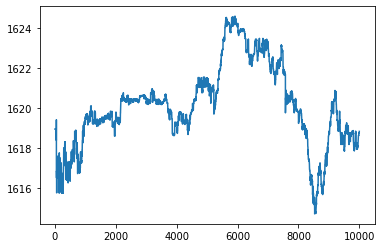

In [119]:
features.head(10000).wap0.plot()

In [96]:
features.groupby('time600')['time1'].apply(lambda x: np.log(x))

/Users/sneddy/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0               -inf
1           0.000000
2           0.693147
3           1.098612
4           1.386294
             ...    
3497661    15.067605
3497662    15.067605
3497663    15.067606
3497664    15.067606
3497665    15.067606
Name: time1, Length: 3497666, dtype: float64

In [97]:
mapping = {'wap1': [np.sum, np.std], 'wap0': [np.sum, np.std]}
df2 = get_stats_window(features, mapping, seconds_in_bucket=0, time_col='time600')
df2

,time600_,wap1_sum,wap1_std,wap0_sum,wap0_std
0,0,970458.0000,0.848475,970247.43750,0.770664
1,1,971122.5625,0.730044,971126.75000,0.960174
2,2,971552.6875,0.498224,971661.93750,0.162176
3,3,971837.1875,0.430867,971876.50000,0.585779
4,4,972078.3750,0.121986,972266.75000,0.110921
...,...,...,...,...,...
5825,5825,946234.2500,1.011455,946182.06250,1.009334
5826,5826,945790.8750,0.552061,945745.18750,0.396642
5827,5827,945821.3125,0.697498,945722.37500,0.611067
5828,5828,945132.5625,0.397777,944909.06250,0.398311


In [98]:
df3 = get_stats_window(features, mapping, seconds_in_bucket=100, time_col='time600', add_suffix=True)
df3

,time600__100,wap1_sum_100,wap1_std_100,wap0_sum_100,wap0_std_100
0,0,970458.0000,0.848475,970247.43750,0.770664
1,1,971122.5625,0.730044,971126.75000,0.960174
2,2,971552.6875,0.498224,971661.93750,0.162176
3,3,971837.1875,0.430867,971876.50000,0.585779
4,4,972078.3750,0.121986,972266.75000,0.110921
...,...,...,...,...,...
5825,5825,946234.2500,1.011455,946182.06250,1.009334
5826,5826,945790.8750,0.552061,945745.18750,0.396642
5827,5827,945821.3125,0.697498,945722.37500,0.611067
5828,5828,945132.5625,0.397777,944909.06250,0.398311


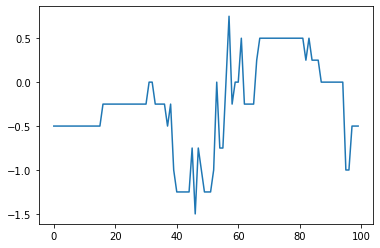

In [72]:
target = data.y[:100].plot()

In [69]:
data[data.y != -0.5]

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
16,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1630.0,1,10,24,6,152,10,2,24,82,12,11,10,1,12,3,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,7,10,1,10,21,3,20,2,27,11,14,35,10,1,10,-0.25
17,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1624.5,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1,10,24,6,152,10,2,24,2,82,12,11,10,1,12,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,7,10,1,10,21,3,20,2,27,11,14,35,10,1,10,-0.25
18,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1624.5,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1,10,24,6,152,10,2,24,2,82,12,11,10,1,12,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1608.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,7,10,1,10,21,3,2,20,2,27,11,14,35,10,1,-0.25
19,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1624.5,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1,10,24,6,152,10,2,24,2,82,12,11,10,1,12,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1609.5,1608.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,7,10,1,10,21,3,2,2,20,2,27,11,14,35,10,-0.25
20,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,1624.5,1625.0,1626.0,1627.0,1628.0,1628.5,1629.0,1,10,24,6,152,12,2,24,2,82,12,11,10,1,12,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1609.5,1608.0,1607.0,1606.5,1606.0,1605.0,1604.0,1603.0,1602.0,7,10,1,10,21,3,2,2,20,2,27,11,14,35,10,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497661,1576.0,1576.5,1577.0,1577.5,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,3,1,10,1,3,1,8,10,10,41,25,20,14,1,2,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.00
3497662,1576.0,1576.5,1577.0,1577.5,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,2,1,10,1,3,1,8,10,10,41,25,20,14,1,2,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.00
3497663,1576.0,1576.5,1577.0,1577.5,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,3,1,10,1,3,1,8,10,10,41,25,20,14,1,2,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.00
3497664,1576.0,1576.5,1577.0,1578.0,1579.0,1579.5,1581.5,1582.0,1582.5,1583.0,1584.0,1585.0,1585.5,1587.5,1588.0,3,1,10,3,1,8,10,10,41,25,20,14,1,2,20,1575.0,1574.0,1573.0,1571.0,1570.5,1570.0,1569.5,1567.0,1566.0,1565.5,1565.0,1564.0,1563.0,1562.5,1562.0,10,4,31,5,2,104,1,25,61,26,7,202,2,2,172,0.00


In [51]:
data.sample(n=1)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
2535692,1666.5,1667.0,1667.5,1668.0,1668.5,1669.0,1669.5,1670.0,1670.5,1671.0,1671.5,1672.0,1673.0,1673.5,1674.0,1,7,8,11,7,13,9,35,9,5,1,5,13,32,55,1666.0,1665.5,1665.0,1664.5,1664.0,1663.5,1663.0,1662.5,1662.0,1661.5,1661.0,1660.5,1660.0,1659.5,1659.0,2,11,11,8,8,8,10,33,33,20,21,19,24,13,17,1.0


In [66]:
row = data.sample(n=1)



draw_moment_book(row, 5)

,bid#,rate,ask#
0,36,1644.0,0
1,6,1644.5,0
2,16,1645.0,0
3,14,1645.5,0
4,9,1646.0,0
5,0,1647.0,8
6,0,1647.5,12
7,0,1648.0,11
8,0,1648.5,6
9,0,1649.0,8


In [12]:
row.iloc[0].to_dict()

{'askRate0': 1656.0,
 'askRate1': 1656.5,
 'askRate2': 1657.0,
 'askRate3': 1657.5,
 'askRate4': 1658.0,
 'askRate5': 1658.5,
 'askRate6': 1659.0,
 'askRate7': 1659.5,
 'askRate8': 1660.0,
 'askRate9': 1660.5,
 'askRate10': 1661.0,
 'askRate11': 1661.5,
 'askRate12': 1662.0,
 'askRate13': 1662.5,
 'askRate14': 1663.0,
 'askSize0': 6.0,
 'askSize1': 6.0,
 'askSize2': 8.0,
 'askSize3': 11.0,
 'askSize4': 119.0,
 'askSize5': 6.0,
 'askSize6': 42.0,
 'askSize7': 11.0,
 'askSize8': 72.0,
 'askSize9': 5.0,
 'askSize10': 71.0,
 'askSize11': 24.0,
 'askSize12': 81.0,
 'askSize13': 24.0,
 'askSize14': 3.0,
 'bidRate0': 1655.0,
 'bidRate1': 1654.5,
 'bidRate2': 1654.0,
 'bidRate3': 1653.5,
 'bidRate4': 1653.0,
 'bidRate5': 1652.5,
 'bidRate6': 1652.0,
 'bidRate7': 1651.5,
 'bidRate8': 1650.5,
 'bidRate9': 1650.0,
 'bidRate10': 1648.5,
 'bidRate11': 1648.0,
 'bidRate12': 1647.5,
 'bidRate13': 1647.0,
 'bidRate14': 1646.0,
 'bidSize0': 5.0,
 'bidSize1': 7.0,
 'bidSize2': 8.0,
 'bidSize3': 4.0,
 'b

In [26]:
y_5_data = data[data.y == 5]
(y_5_data.askRate0 - y_5_data.bidRate0).value_counts()

1.0    127
0.5     67
1.5     41
2.5      9
2.0      2
dtype: int64

In [28]:
y_5_data

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
192211,1622.0,1627.5,1628.5,1630.0,1631.0,1631.5,1632.0,1633.0,1633.5,1634.5,1635.0,1636.0,1636.5,1638.0,1640.0,10.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,9.0,4.0,1621.5,1621.0,1620.5,1620.0,1619.5,1619.0,1617.0,1616.5,1616.0,1615.5,1615.0,1613.0,1612.0,1611.0,1610.0,1.0,1.0,1.0,11.0,3.0,1.0,6.0,1.0,6.0,25.0,26.0,2.0,25.0,2.0,36.0,5.0
192212,1622.0,1627.5,1628.5,1630.0,1630.5,1631.0,1631.5,1632.0,1633.0,1633.5,1634.5,1635.0,1636.0,1636.5,1638.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,9.0,1621.5,1621.0,1620.5,1620.0,1619.5,1619.0,1617.0,1616.5,1616.0,1615.5,1615.0,1613.0,1612.0,1611.0,1610.0,1.0,1.0,1.0,11.0,3.0,1.0,6.0,1.0,6.0,25.0,26.0,2.0,25.0,2.0,36.0,5.0
192213,1622.0,1627.5,1628.5,1630.0,1630.5,1631.0,1631.5,1632.0,1633.0,1633.5,1634.5,1635.0,1636.0,1636.5,1638.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,9.0,1621.0,1620.5,1620.0,1619.5,1619.0,1617.0,1616.5,1616.0,1615.5,1615.0,1613.0,1612.0,1611.0,1610.0,1608.0,1.0,1.0,11.0,3.0,1.0,6.0,1.0,6.0,25.0,26.0,2.0,25.0,2.0,36.0,5.0,5.0
192214,1622.0,1623.5,1627.5,1628.5,1630.0,1630.5,1631.0,1631.5,1632.0,1633.0,1633.5,1634.5,1635.0,1636.0,1636.5,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,1621.0,1620.5,1620.0,1619.5,1619.0,1617.0,1616.5,1616.0,1615.5,1615.0,1613.0,1612.0,1611.0,1610.0,1608.0,1.0,1.0,11.0,3.0,1.0,6.0,1.0,6.0,25.0,26.0,2.0,25.0,2.0,36.0,5.0,5.0
192215,1622.0,1623.5,1627.5,1628.5,1630.0,1630.5,1631.0,1631.5,1632.0,1633.0,1633.5,1634.5,1635.0,1636.0,1636.5,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,1.0,1621.0,1620.5,1620.0,1619.5,1619.0,1617.0,1616.5,1616.0,1615.5,1615.0,1613.0,1612.0,1611.0,1610.0,1608.0,1.0,1.0,10.0,3.0,1.0,6.0,1.0,6.0,25.0,26.0,2.0,25.0,2.0,36.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395539,1592.0,1592.5,1593.0,1593.5,1594.0,1594.5,1595.0,1595.5,1596.0,1596.5,1597.0,1597.5,1598.0,1598.5,1599.0,4.0,2.0,13.0,6.0,11.0,7.0,25.0,6.0,5.0,6.0,4.0,2.0,57.0,2.0,25.0,1591.0,1590.5,1590.0,1589.5,1589.0,1588.5,1588.0,1587.5,1587.0,1586.5,1586.0,1585.5,1585.0,1584.0,1583.5,2.0,5.0,8.0,5.0,2.0,5.0,15.0,6.0,1.0,5.0,2.0,6.0,2.0,3.0,7.0,5.0
3395540,1592.0,1592.5,1593.0,1593.5,1594.0,1594.5,1595.0,1595.5,1596.0,1596.5,1597.0,1597.5,1598.0,1598.5,1599.0,4.0,2.0,13.0,6.0,11.0,7.0,25.0,6.0,5.0,6.0,4.0,2.0,57.0,2.0,24.0,1591.0,1590.5,1590.0,1589.5,1589.0,1588.5,1588.0,1587.5,1587.0,1586.5,1586.0,1585.5,1585.0,1584.0,1583.5,2.0,5.0,8.0,5.0,2.0,5.0,15.0,6.0,1.0,5.0,2.0,6.0,2.0,3.0,7.0,5.0
3395541,1592.0,1592.5,1593.0,1593.5,1594.0,1594.5,1595.0,1595.5,1596.0,1596.5,1597.0,1597.5,1598.0,1598.5,1599.0,4.0,2.0,13.0,6.0,11.0,7.0,25.0,6.0,5.0,6.0,4.0,2.0,57.0,2.0,24.0,1591.0,1590.5,1590.0,1589.5,1589.0,1588.5,1588.0,1587.5,1587.0,1586.5,1586.0,1585.5,1585.0,1584.0,1583.5,2.0,6.0,8.0,5.0,2.0,5.0,15.0,5.0,1.0,5.0,2.0,6.0,2.0,3.0,7.0,5.0
3395542,1592.0,1592.5,1593.0,1593.5,1594.0,1594.5,1595.0,1595.5,1596.0,1596.5,1597.0,1597.5,1598.0,1598.5,1599.0,4.0,2.0,13.0,6.0,11.0,7.0,25.0,6.0,5.0,6.0,4.0,2.0,57.0,2.0,24.0,1591.0,1590.5,1590.0,1589.5,1589.0,1588.5,1588.0,1587.5,1587.0,1586.5,1586.0,1585.5,1585.0,1584.0,1583.5,2.0,6.0,8.0,5.0,2.0,5.0,16.0,4.0,1.0,5.0,2.0,6.0,2.0,3.0,7.0,5.0


In [27]:
(data.askRate0 - data.bidRate0).value_counts()

0.5    2390639
1.0     976090
1.5      93712
2.0      23456
2.5       6005
3.0       3112
3.5       1522
4.0       1012
4.5        581
5.0        490
6.0        317
5.5        264
6.5        224
7.0        143
8.5         36
8.0         36
7.5         25
9.0          2
dtype: int64

<AxesSubplot:>

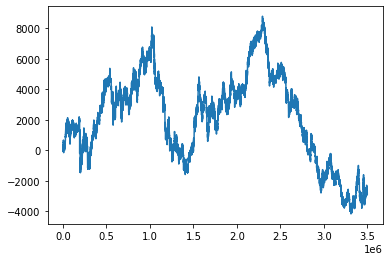

In [34]:
data.y.cumsum().plot()

<AxesSubplot:>

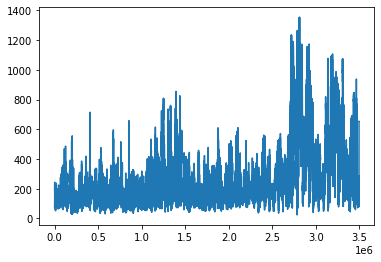

In [32]:
data.iloc[:, -16:-1].sum(1).plot()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
192211,-0.341422,63.942124,54.199981,54.587886,50.625173,44.714733,38.717853,35.479573,30.600509,27.427076,22.064765,18.358469,14.608994,13.261397,12.824659,0.832269,-2.312007,-2.493654,-2.420463,-2.309597,-2.268404,-1.653013,-1.466043,-1.758125,-1.617309,-1.416877,-0.554582,-1.284132,0.028775,-0.563999,0.0,-0.088763,-0.101359,-0.106086,-0.110479,-0.114037,9.143437,8.120126,7.083825,5.766717,4.403808,6.849394,6.167413,5.580498,5.078601,-1.360985,-2.419676,-2.635809,0.019539,-1.476856,-2.306347,-0.674306,-1.970235,-0.488825,0.946877,0.945786,-1.001117,0.843428,-0.933852,1.061439,5.0
192212,-0.341422,63.942124,54.199981,54.587886,47.001629,41.513319,35.944721,30.733989,28.551955,23.979083,20.672516,16.166087,13.729345,11.102956,10.408445,0.832269,-2.312007,-2.493654,-2.420463,-2.309597,-2.268404,-2.117068,-1.466043,-1.351078,-1.617309,-1.416877,-1.341220,-0.538360,-1.256625,-0.021448,0.0,-0.088763,-0.101359,-0.106086,-0.110479,-0.114037,9.143437,8.120126,7.083825,5.766717,4.403808,6.849394,6.167413,5.580498,5.078601,-1.360985,-2.419676,-2.635809,0.019539,-1.476856,-2.306347,-0.674306,-1.970235,-0.488825,0.946877,0.945786,-1.001117,0.843428,-0.933852,1.061439,5.0
192213,-0.341422,63.942124,54.199981,54.587886,47.001629,41.513319,35.944721,30.733989,28.551955,23.979083,20.672516,16.166087,13.729345,11.102956,10.408445,0.832269,-2.312007,-2.493654,-2.420463,-2.309597,-2.268404,-2.117068,-1.466043,-1.351078,-1.617309,-1.416877,-1.341220,-0.538360,-1.256625,-0.021448,0.5,-0.088763,-0.101359,-0.106086,-0.110479,10.190512,9.143437,8.120126,7.083825,5.766717,9.045415,8.041664,7.101730,6.333396,6.939848,-1.360985,-2.419676,0.020660,-1.535826,-2.395219,-0.710174,-2.187473,-0.534916,0.937094,0.985504,-1.085038,0.918279,-0.970381,1.122959,-0.393535,5.0
192214,-0.341422,12.719974,44.327743,41.967033,43.378084,38.311906,33.171590,28.361197,24.454847,22.255087,17.888018,15.069896,11.970047,10.383476,8.596285,0.832269,-2.312007,-2.493654,-2.420463,-2.309597,-2.268404,-2.117068,-1.903987,-1.351078,-1.224474,-1.416877,-1.341220,-1.284132,-0.524816,-1.281212,0.5,-0.088763,-0.101359,-0.106086,-0.110479,10.190512,9.143437,8.120126,7.083825,5.766717,9.045415,8.041664,7.101730,6.333396,6.939848,-1.360985,-2.419676,0.020660,-1.535826,-2.395219,-0.710174,-2.187473,-0.534916,0.937094,0.985504,-1.085038,0.918279,-0.970381,1.122959,-0.393535,5.0
192215,-0.341422,12.719974,44.327743,41.967033,43.378084,38.311906,33.171590,28.361197,24.454847,22.255087,17.888018,15.069896,11.970047,10.383476,8.596285,0.832269,-2.312007,-2.493654,-2.420463,-2.309597,-2.268404,-2.117068,-1.903987,-1.351078,-1.224474,-1.416877,-1.341220,-1.284132,-0.524816,-1.281212,0.5,-0.088763,-0.101359,-0.106086,-0.110479,10.190512,9.143437,8.120126,7.083825,5.766717,9.045415,8.041664,7.101730,6.333396,6.939848,-1.360985,-2.419676,-0.108343,-1.535826,-2.395219,-0.710174,-2.187473,-0.534916,0.937094,0.985504,-1.085038,0.918279,-0.970381,1.122959,-0.393535,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395539,-1.238381,-0.085563,-0.097325,-0.102476,-0.104451,-0.105060,-0.105991,-0.112309,-0.127799,-0.156865,-0.211218,-0.276782,-0.345039,-0.408730,-0.464515,-0.169470,-1.744745,0.209740,-0.731187,-0.052916,-0.559627,0.818521,-0.550876,-0.65

In [5]:
for i in range(1,15):
    col_name = f'askRate{i}'
    data[col_name] = data[col_name] - data[f'askRate0']
    nan_value = data[col_name].min() - 0.5
    data[col_name].fillna(nan_value, inplace=True)
    most_common = data[col_name].value_counts().index[0]
    data[col_name] = data[col_name] - most_common
#     data[col_name] = (data[col_name] - data[col_name].mean()) / data[col_name].std()

for i in range(0,15):
    col_name = f'askSize{i}'
    data[col_name].fillna(0, inplace=True)
    data[col_name] = data[col_name].apply(np.log1p)
#     data[col_name] = (data[col_name] - data[col_name].mean()) / data[col_name].std()
    
for i in range(1,15):
    col_name = f'bidRate{i}'
    data[col_name] = data['bidRate0'] - data[col_name]
    most_common = data[col_name].value_counts().index[0]
    data[col_name] = data[col_name] - most_common
#     data[col_name] = (data[col_name] - data[col_name].mean()) / data[col_name].std()
    
data['bidRate0'] = data[f'askRate0'] - data['bidRate0'] - 0.5

for i in range(0,15):
    col_name = f'bidSize{i}'
    data[col_name].fillna(0, inplace=True)
    data[col_name] = data[col_name].apply(np.log1p)
    data[col_name] = (data[col_name] - data[col_name].mean()) / data[col_name].std()

data.askRate0 = (data.askRate0 - data.askRate0.mean()) / data.askRate0.std()
data.head(15)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,-0.416169,-0.085563,4.838794,-4.309427,-3.727995,-3.306474,-2.879123,-2.485101,-2.176353,-1.880861,-1.603467,-1.372973,-1.224688,-1.128210,-1.068569,-1.333622,0.073005,1.015265,-3.355131,-3.182600,-3.122793,-2.910376,-2.652656,-2.453978,-2.288866,-2.029744,-1.936289,-1.848286,-1.810216,-1.823763,4.0,6.363897,10.075908,12.819994,14.960163,17.060211,30.749637,30.113557,28.769712,25.585169,21.423034,17.579824,13.641951,10.850788,9.42151,0.458108,0.082481,-2.635809,-0.103648,0.720158,-1.423193,0.652669,1.053393,0.096889,0.38391,1.211681,0.153714,-1.310942,0.129864,0.284139,-0.5
1,-0.416169,-0.085563,4.838794,4.104475,-3.727995,-3.306474,-2.879123,-2.485101,-2.176353,-1.880861,-1.603467,-1.372973,-1.224688,-1.128210,-1.068569,-1.333622,0.073005,1.015265,-0.939050,-3.182600,-3.122793,-2.910376,-2.652656,-2.453978,-2.288866,-2.029744,-1.936289,-1.848286,-1.810216,-1.823763,4.0,6.363897,10.075908,12.819994,14.960163,17.060211,30.749637,30.113557,28.769712,25.585169,21.423034,17.579824,13.641951,10.850788,9.42151,0.458108,0.082481,-2.635809,-0.103648,0.720158,-1.423193,0.652669,1.053393,0.096889,0.38391,1.211681,0.153714,-1.310942,0.129864,0.284139,-0.5
2,-0.416169,-0.085563,4.838794,4.104475,3.519094,-3.306474,-2.879123,-2.485101,-2.176353,-1.880861,-1.603467,-1.372973,-1.224688,-1.128210,-1.068569,-1.333622,0.073005,1.015265,-0.939050,-1.798923,-3.122793,-2.910376,-2.652656,-2.453978,-2.288866,-2.029744,-1.936289,-1.848286,-1.810216,-1.823763,4.0,6.363897,10.075908,12.819994,14.960163,17.060211,30.749637,30.113557,28.769712,25.585169,21.423034,17.579824,13.641951,10.850788,9.42151,0.458108,0.082481,-2.635809,-0.103648,0.720158,-1.423193,0.652669,1.053393,0.096889,0.38391,1.211681,0.153714,-1.310942,0.129864,0.284139,-0.5
3,-0.416169,-0.085563,4.838794,4.104475,3.519094,-3.306474,-2.879123,-2.485101,-2.176353,-1.880861,-1.603467,-1.372973,-1.224688,-1.128210,-1.068569,-1.333622,0.073005,1.015265,-0.939050,0.766484,-3.122793,-2.910376,-2.652656,-2.453978,-2.288866,-2.029744,-1.936289,-1.848286,-1.810216,-1.823763,4.0,6.363897,10.075908,12.819994,14.960163,17.060211,30.749637,30.113557,28.769712,25.585169,21.423034,17.579824,13.641951,10.850788,9.42151,0.458108,0.082481,-2.635809,-0.103648,0.720158,-1.423193,0.652669,1.053393,0.096889,0.38391,1.211681,0.153714,-1.310942,0.129864,0.284139,-0.5
4,-0.416169,-0.085563,4.838794,4.104475,3.519094,-3.306474,-2.879123,-2.485101,-2.176353,-1.880861,-1.603467,-1.372973,-1.224688,-1.128210,-1.068569,-1.333622,0.073005,1.015265,-0.939050,1.221173,-3.122793,-2.910376,-2.652656,-2.453978,-2.288866,-2.029744,-1.936289,-1.848286,-1.810216,-1.823763,4.0,6.363897,10.075908,12.819994,14.960163,17.060211,30.749637,30.113557,28.769712,25.585169,21.423034,17.579824,13.641951,10.850788,9.42151,0.458108,0.082481,-2.635809,-0.103648,0.720158,-1.423193,0.652669,1.053393,0.096889,0.38391,1.211681,0.153714,-1.310942,0.129864,0.284139,-0.5
5,-0.416169,-0.085563,4.838794,4.104475,3.519094,-3.306474,-2.879123,-2.485101,-2.176353,-1.880861,-1.603467,-1.372973,-1.224688,-1.128210,-1.068569,-1.333622,0.073005,1.015265,-0.939050,3.153124,-3.122793,-2.910376,-2.652656,-2.453978,-2.288866,-2.029744,-1.936289,-1.848286,-1.810216,-1.823763,4.0,6.363897,10.075908,12.819994,14.960163,17.060211,30.749637,30.113557,28.769712,25.585169,21.423034,17.579824,13.641951,10.850788,9.42151,0.458108,0.082481,-2.635809,-0.103648,0.720158,-1.423193,0.652669,1.053393,0.096889,0.38391,1.

In [6]:
data.bidRate0.value_counts()

0.0    2390639
0.5     976090
1.0      93712
1.5      23456
2.0       6005
2.5       3112
3.0       1522
3.5       1012
4.0        581
4.5        490
5.5        317
5.0        264
6.0        224
6.5        143
7.5         36
8.0         36
7.0         25
8.5          2
Name: bidRate0, dtype: int64

In [11]:
data.sample(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
2677054,0.435943,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.5,6.0,6.5,7.0,7.5,0.693147,3.044522,3.135494,3.465736,3.496508,2.079442,1.386294,1.791759,1.386294,2.890372,0.693147,1.945910,1.945910,3.367296,1.386294,0.5,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.0,-6.5,-7.0,0.693147,1.098612,1.609438,1.386294,1.791759,1.386294,1.791759,1.098612,1.791759,1.098612,1.609438,1.098612,2.564949,2.397895,1.386294,0.50
352660,-0.191929,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0,6.5,7.0,8.0,1.609438,2.079442,4.204693,2.302585,2.564949,2.079442,3.178054,3.496508,3.178054,1.945910,4.110874,5.017280,0.693147,4.418841,4.564348,0.5,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.5,-7.5,-8.0,2.197225,2.397895,2.772589,3.688879,2.197225,2.197225,1.791759,1.098612,1.609438,3.218876,1.098612,3.332205,3.496508,2.079442,0.693147,2.50
1323501,-0.730104,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,7.0,7.5,2.079442,2.079442,2.197225,1.945910,1.791759,2.079442,1.609438,1.791759,1.609438,1.945910,2.197225,3.496508,3.433987,0.693147,0.693147,0.5,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.0,-6.5,-7.0,1.609438,2.708050,2.397895,2.397895,2.302585,3.178054,1.945910,2.772589,3.135494,2.484907,1.386294,4.043051,3.465736,4.060443,1.098612,-0.50
3361943,-1.776557,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,7.0,7.5,3.258097,3.688879,4.564348,3.688879,3.401197,2.397895,3.332205,2.397895,3.401197,0.693147,3.970292,2.890372,4.442651,3.713572,0.693147,1.0,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.0,-6.5,-7.0,1.945910,2.639057,2.484907,2.639057,3.218876,2.484907,2.639057,2.079442,2.564949,1.945910,1.386294,3.367296,2.708050,2.484907,2.079442,0.00
3120715,-1.432723,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,2.397895,2.833213,2.302585,2.890372,2.564949,2.484907,2.302585,2.484907,2.564949,3.401197,1.945910,1.386294,0.693147,2.197225,3.401197,0.5,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.0,-6.5,-7.0,1.386294,2.564949,2.995732,2.772589,3.496508,2.708050,2.708050,3.044522,3.583519,2.397895,4.543295,3.713572,1.945910,1.386294,4.394449,-0.50
1298765,-0.610510,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,1.945910,2.564949,2.302585,0.693147,2.564949,1.609438,1.098612,0.693147,1.386294,1.791759,3.135494,1.098612,2.639057,3.332205,3.258097,1.0,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.0,-7.0,-7.5,1.386294,2.833213,2.302585,2.772589,2.564949,1.386294,2.708050,1.386294,1.945910,1.098612,1.791759,1.609438,1.791759,4.060443,2.708050,0.50
2458134,0.944220,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,1.386294,2.197225,2.564949,2.564949,4.043051,2.890372,3.433987,3.761200,2.302585,2.708050,3.218876,1.791759,0.693147,1.945910,1.098612,0.5,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.0,-6.5,-7.0,1.945910,2.397895,2.302585,3.135494,2.772589,3.295837,2.397895,2.772589,2.079442,2.708050,1.098612,2.639057,2.484907,1.098612,1.791759,-0.25
2305381,2.065420,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,1.098612,2.944439,2.564949,2.833213,2.708050,4.418841,2.397895,2.397895,2.639057,4.025352,3.178054,2.890372,0.693147,2.564949,3.367296,0.5,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.5,-4.0,-4.5,-5.0,-5.5,-6.0,-6.5,-7.0,2.639057,2.833213,2.995732,2.564949,4.343805,2.564949,2.639057,2.197225,2.772589,1.945910,2.197225,1.945910,2.833213,3.401197,1.945910,0.25
691347,0.211703,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.

In [71]:
(data.bidRate0 - data.bidRate1).isnull().sum()

0

<AxesSubplot:>

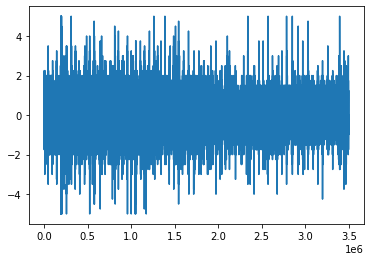

In [21]:
data.y.plot()

In [56]:
data.iloc[:,:10]

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9
0,1619.5,0.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1619.5,0.5,1.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1619.5,0.5,1.5,2.0,2.5,NaN,NaN,NaN,NaN,NaN
3,1619.5,0.5,1.5,2.0,2.5,NaN,NaN,NaN,NaN,NaN
4,1619.5,0.5,1.5,2.0,2.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3497661,1576.0,0.5,1.0,1.5,2.0,3.0,3.5,5.5,6.0,6.5
3497662,1576.0,0.5,1.0,1.5,2.0,3.0,3.5,5.5,6.0,6.5
3497663,1576.0,0.5,1.0,1.5,2.0,3.0,3.5,5.5,6.0,6.5
3497664,1576.0,0.5,1.0,2.0,3.0,3.5,5.5,6.0,6.5,7.0


In [51]:
data.askRate0.ewm(halflife=10).mean()

0         -0.416169
1         -0.416169
2         -0.416169
3         -0.416169
4         -0.416169
             ...   
3497661   -1.722752
3497662   -1.722351
3497663   -1.721977
3497664   -1.721627
3497665   -1.721301
Name: askRate0, Length: 3497666, dtype: float64

In [52]:
def add_ewm_cols(data, col, halflife_list):
    for halflife in halflife_list:
        data[col + f'_ewm{halflife}'] = data[col].ewm(halflife=halflife).mean()
add_ewm_cols(data, 'askRate0', [10, 100, 1000, 10000])

In [7]:
class Splitter():
    def __init__(self, test_size):
        self.test_size = test_size
    
    def __call__(self, data):
        n_train = int((1 - self.test_size) * data.shape[0])
        return data[:n_train], data[n_train:]
# data.fillna(0, inplace=True)
train_data, test_data = Splitter(0.25)(data)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge

model = LinearRegression()
model.fit(train_data.drop('y', 1), train_data.y)
predicted = model.predict(test_data.drop('y', 1))
corr_score = np.corrcoef(predicted, test_data.y)[0,1]
print(f'Correlation: {corr_score:.6f}')

Correlation: 0.130648


In [21]:
data.y.value_counts()

 0.00    771091
-0.50    460349
 0.50    453009
 0.25    380643
-0.25    375411
 0.75    193894
-0.75    189360
-1.00    184941
 1.00    184771
 1.25     66115
-1.25     63726
-1.50     47820
 1.50     46459
-1.75     16715
 1.75     16591
-2.00     11066
 2.00     10718
-2.25      4200
 2.25      4120
-2.50      3368
 2.50      2789
 2.75      1458
-2.75      1407
-3.00      1200
 3.00      1063
-3.25       738
 3.25       636
-3.50       569
-5.00       550
 3.50       504
 3.75       333
 4.00       296
-4.00       271
-3.75       262
 5.00       246
-4.25       218
 4.50       197
 4.25       160
-4.50       150
-4.75       134
 4.75       118
Name: y, dtype: int64

In [17]:
data.y.max()

5.0

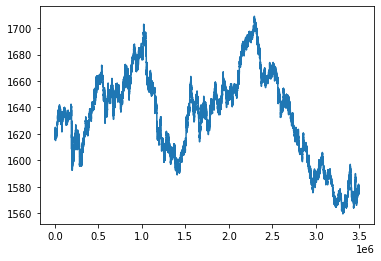

askRate0


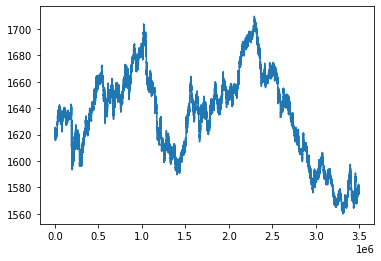

askRate1


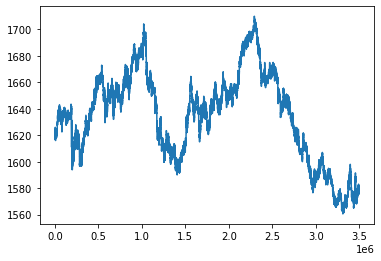

askRate2


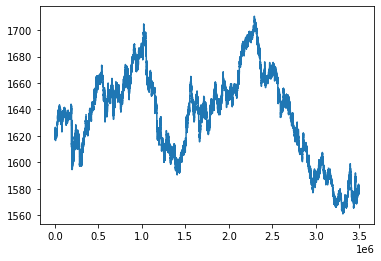

askRate3


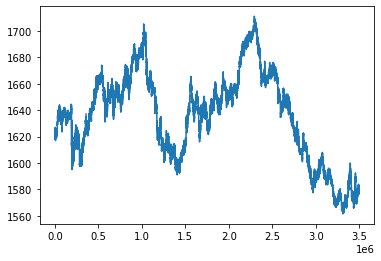

askRate4


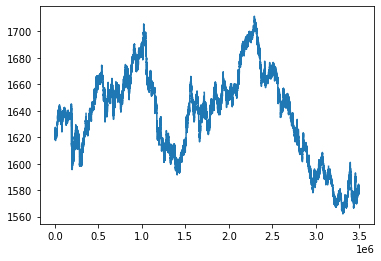

askRate5


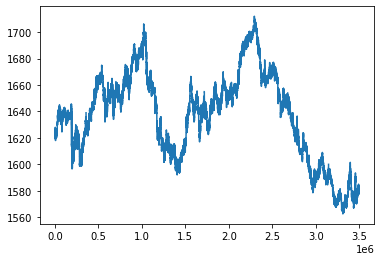

askRate6


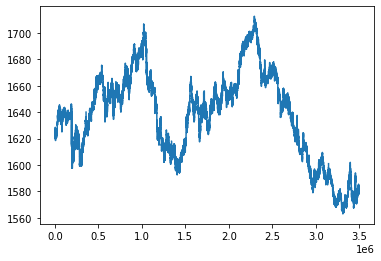

askRate7


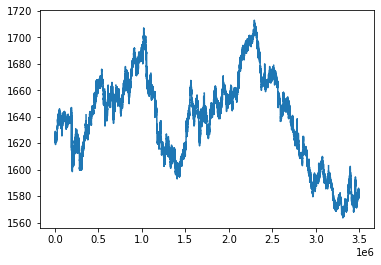

askRate8


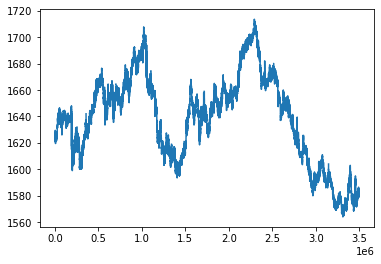

askRate9


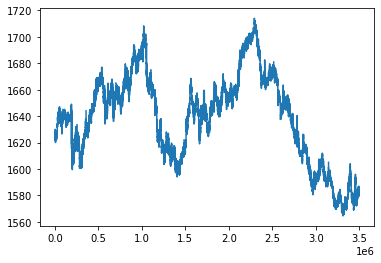

askRate10


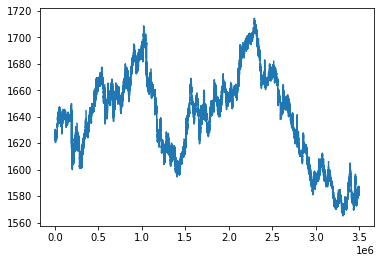

askRate11


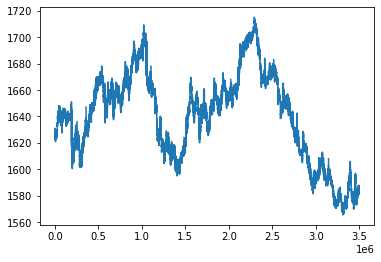

askRate12


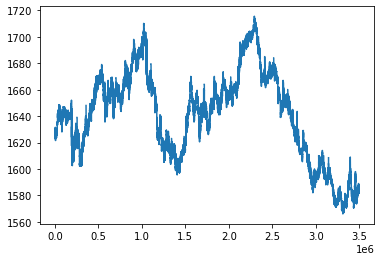

askRate13


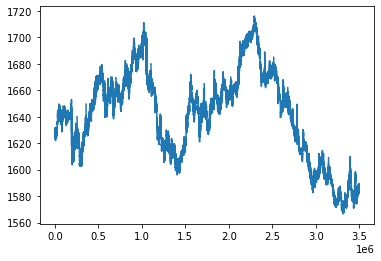

askRate14


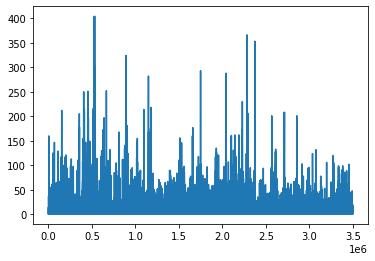

askSize0


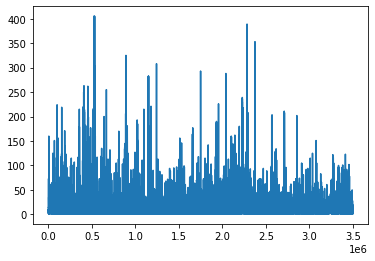

askSize1


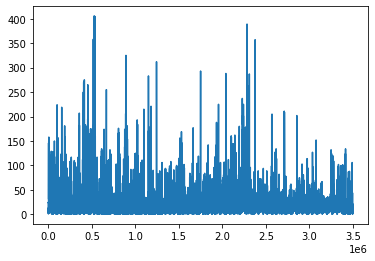

askSize2


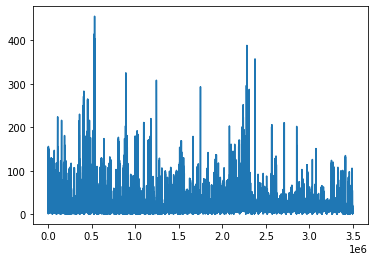

askSize3


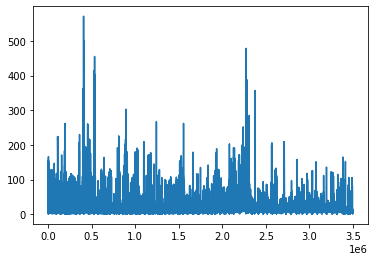

askSize4


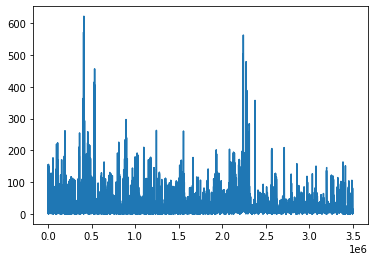

askSize5


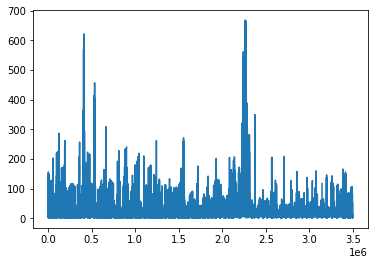

askSize6


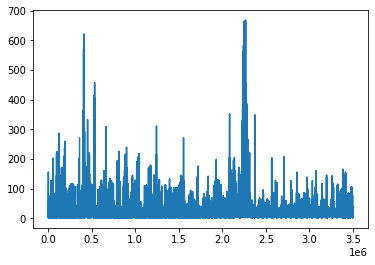

askSize7


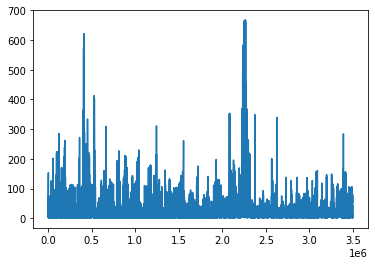

askSize8


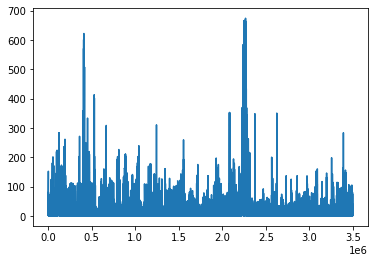

askSize9


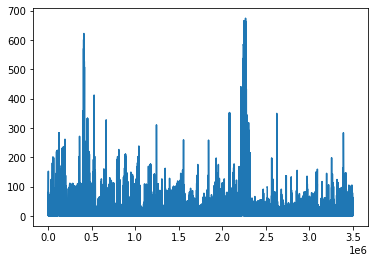

askSize10


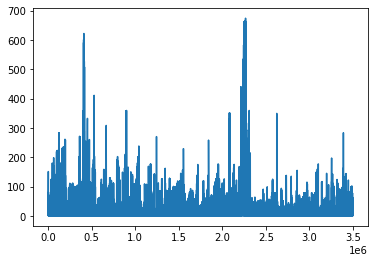

askSize11


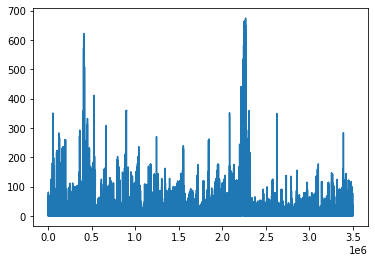

askSize12


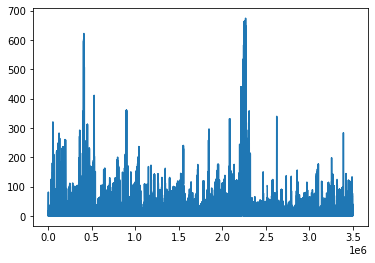

askSize13


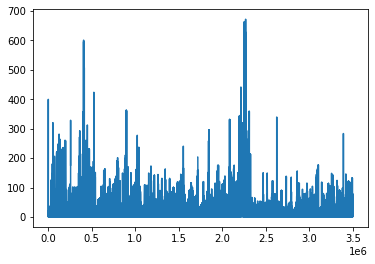

askSize14


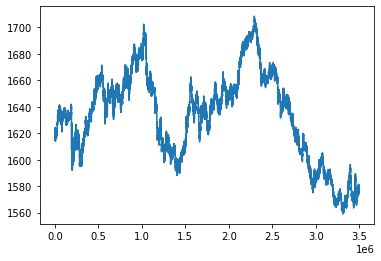

bidRate0


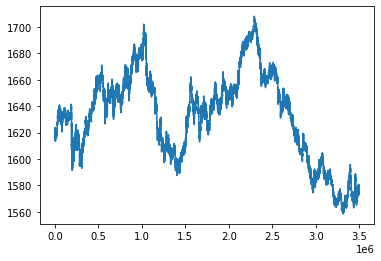

bidRate1


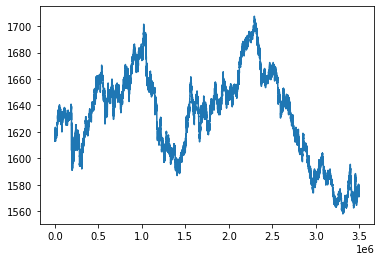

bidRate2


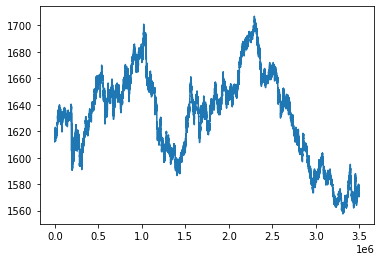

bidRate3


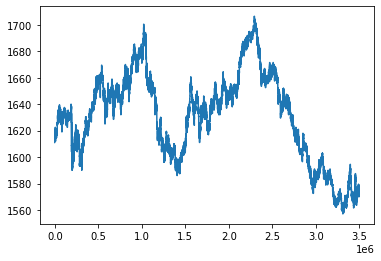

bidRate4


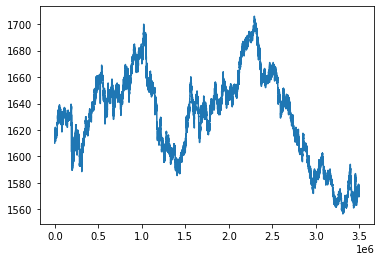

bidRate5


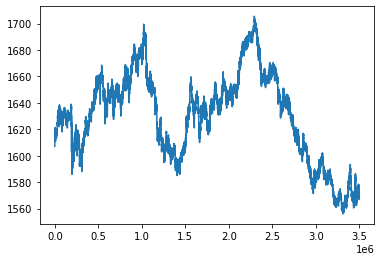

bidRate6


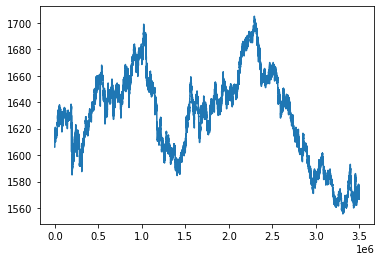

bidRate7


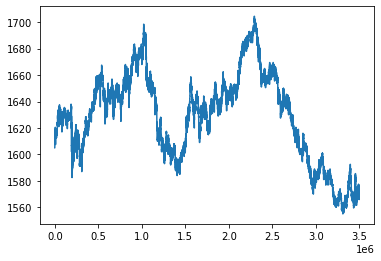

bidRate8


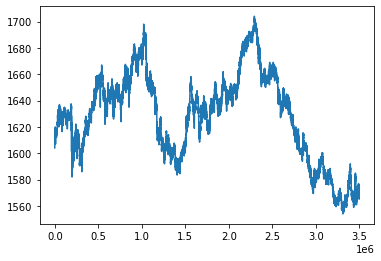

bidRate9


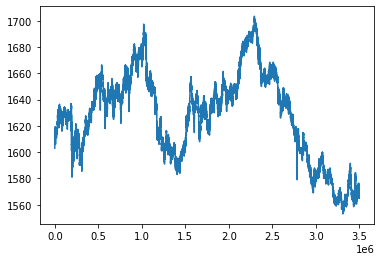

bidRate10


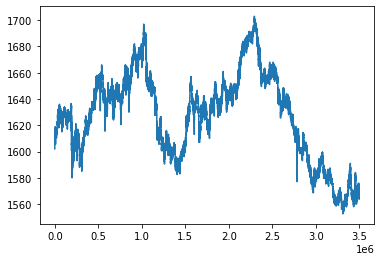

bidRate11


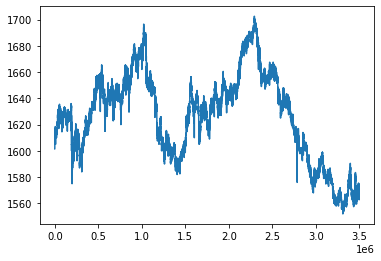

bidRate12


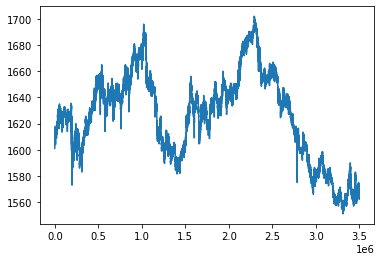

bidRate13


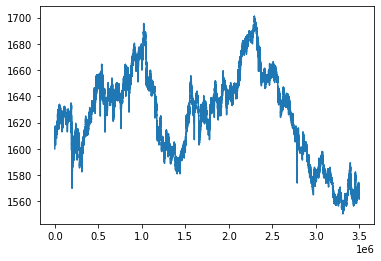

bidRate14


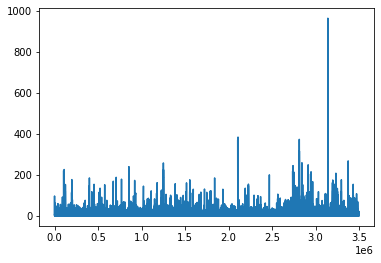

bidSize0


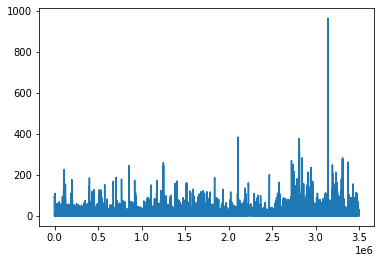

bidSize1


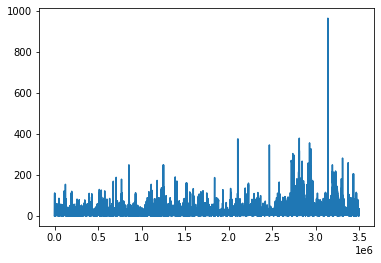

bidSize2


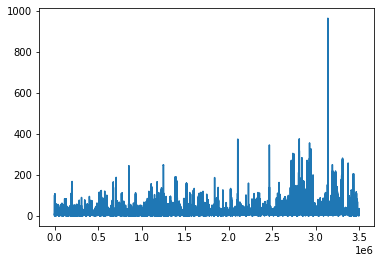

bidSize3


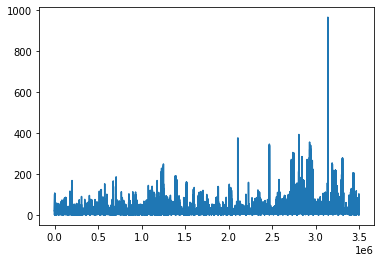

bidSize4


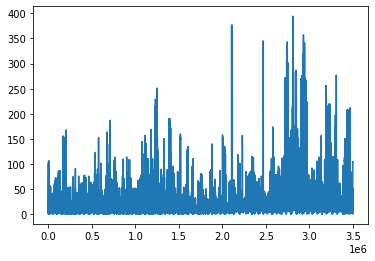

bidSize5


KeyboardInterrupt: 

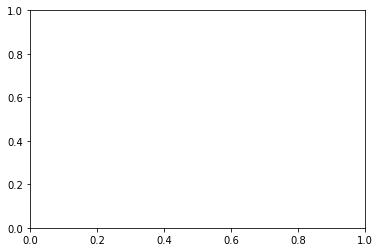

In [26]:
for col in data:
    data[col].plot()
    plt.show()
    print(col)